# ECE3311 Project 3
## Team 6: Maya Flores, Selina Spry, Emma Williams
Submission Date: 11/17/20

In [7]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from commpy.filters import rcosfilter, rrcosfilter
import scipy.signal
import scipy.interpolate
import math

In [8]:
# Matlab's interp function
def interpolate_1d_vector(vector, factor):
    """
    Interpolate, i.e. upsample, a given 1D vector by a specific interpolation factor.
    :param vector: 1D data vector
    :param factor: factor for interpolation (must be integer)
    :return: interpolated 1D vector by a given factor
    """
    x = np.arange(np.size(vector))
    y = vector
    f = scipy.interpolate.interp1d(x, y, kind='cubic')

    x_extended_by_factor = np.linspace(x[0], x[-1], np.size(x) * factor)
    y_interpolated = np.zeros(np.size(x_extended_by_factor))

    i = 0
    for x in x_extended_by_factor:
        y_interpolated[i] = f(x)
        i += 1

    return y_interpolated

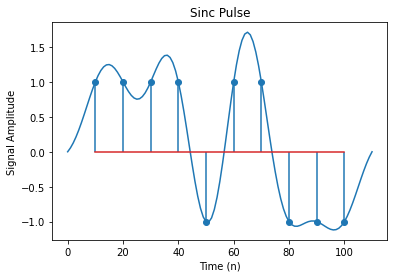

In [9]:
# Generate random polar data
d = 2*np.around(np.random.random((10,)))-1

# Define sinc pulse shape
ps_sinc = np.sinc(np.arange(-11,11,0.1))

# Create transmission using Sinc pulse shape
# Upsampling 
N = 10
d_upsample = np.zeros((N*N,))
d_upsample[::N] = d  #impulse train
sig_temp1 = np.convolve(d_upsample, ps_sinc)
sig1 = sig_temp1[100:211]

# Sample the received waveform to 
# extract out of it the desired values
index = np.arange(10,110,10)
d_hat1 = sig1[index]

plt.plot(sig1)              # Plot the sinc pulse shaped signal
plt.stem(index,d_hat1)      # Plot the sampled stem waveform

plt.title('Sinc Pulse')
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

## Question 1:
<br>Based on the sinc pulse shape example in Section 3, you are tasked with implementing a similar pulse shaping transmission system using the raised cosine pulse shape.Furthermore, you will need to demonstrate that it is possible to extract the original samplesfrom the recovered pulse shaped signal, similar to the plot shown in Figure 3.

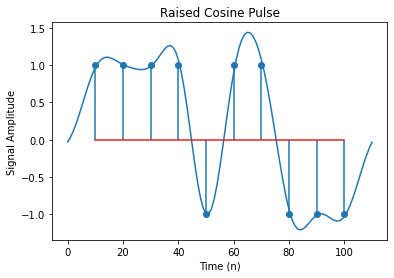

In [10]:
# Define raised cosine pulse shape (roll-off = 0.5)
ps_rcos = rcosfilter(61,0.5,1,10)

# Create transmission using rcos pulse shape
# Upsampling 
sig_temp2 = np.convolve(d_upsample, ps_rcos[1])
sig2 = sig_temp2[20:131]

plt.plot(sig2)              # Plot the raised cosine pulse shaped signal
plt.stem(index,d_hat1)      # Plot the sampled stem waveform

plt.title('Raised Cosine Pulse')
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

## Question 2:
<br> Please demonstrate that only using the square-root raised cosine pulse shaping filter at the transmitter will not eliminate ISI when the received signal is sampled in order to recover the original data,i.e., produce the plot shown in Figure 4.

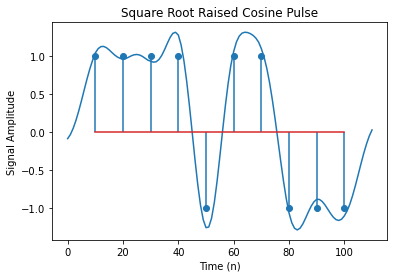

In [11]:
# Define square-root raised cosine pulse shape (roll-off = 0.5)
ps_srrcos = rrcosfilter(61,0.5,1,10)

# Create transmission using sqrt rcos pulse shape
# Upsampling 
sig_temp3 = np.convolve(d_upsample, ps_srrcos[1])
sig3 = sig_temp3[20:131]

plt.plot(sig3)              # Plot the sqrt raised cosine pulse shaped signal
plt.stem(index,d_hat1)      # Plot the sampled stem waveform

plt.title('Square Root Raised Cosine Pulse')
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

## Question 3:
<br>Please demonstrate how two square-root raised cosine filters in series can yield recovered samples that do not suffer the impact of ISI

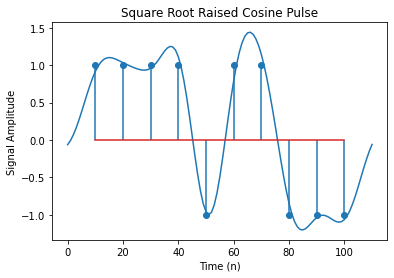

In [12]:
# Create transmission using sqrt rcos pulse shape
# Upsampling 
sig_temp4 = np.convolve(sig_temp3, ps_srrcos[1])/10    # sqrt raised cos filter convolved with previous sqrt raised cos filter signal
sig4 = sig_temp4[50:161]

plt.plot(sig4)              # Plot the signal filtered by 2 sqrt raised cosine filters in series
plt.stem(index,d_hat1)      # Plot the sampled stem waveform

plt.title('Square Root Raised Cosine Pulse')
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

## Question 4:
<br>Please demonstrate this same situation by replicating the impact of a non-ideal channel as shown in Figure 6.

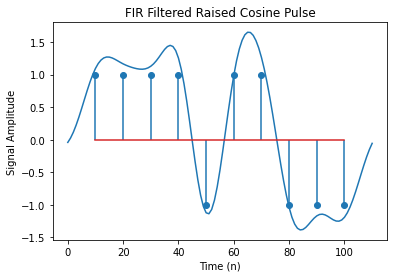

In [13]:
# Create a channel with some multipath propagation
h = [1,0.1,0.05,0.001]      # FIR filter

# Define raised cosine pulse shape (roll-off = 0.5)
ps_rcos = rcosfilter(61,0.5,1,10)

# Create transmission 
# Upsampling 
sig_temp5 = np.convolve(d_upsample, ps_rcos[1])
sig_temp6 = np.convolve(sig_temp5, h)
sig6 = sig_temp6[20:131]

plt.plot(sig6)              # Plot the signal passed through the raised cosine pulse shape and FIR filter, h
plt.stem(index,d_hat1)      # Plot the sampled stem waveform

plt.title('FIR Filtered Raised Cosine Pulse')
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

## Question 5:
<br>For this section, please obtain a filter that can mitigate the impact of h, and demonstrate its effectiveness using a plot similar to Figure 7. It is recommended to use a function such as scipy.signal.lfilter.

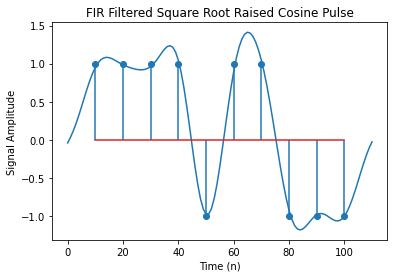

In [14]:
# Create a channel with some multipath propagation
h = [-1,0.1,0.05,0.001]      # FIR filter, inverted from the previous h

# Create transmission 
sig7 = scipy.signal.lfilter(h,-1,sig6)      # Use scippy.signal.filter to filter the previous signal

plt.plot(sig7)              # Plot the filtered signal that mitigates the impact of h
plt.stem(index,d_hat1)      # Plot the sampled stem waveform

plt.title('FIR Filtered Square Root Raised Cosine Pulse')
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

## Question 6:
<br>Please implement and demonstrate a PM waveform similar to the one shown in Figure 9

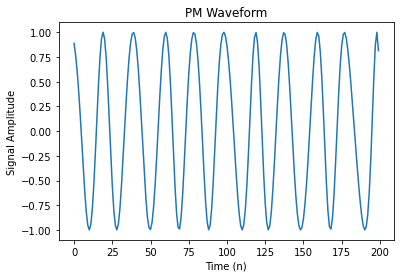

In [15]:
# Specify carrier frequency
w_c = 2*np.pi*5

# Generate a discrete version of a random continuous analog
# waveform using a Uniform Random Number Generator and
# an interpolation function to smooth out the result
L = 200  # Length of the overall transmission
M = 10   # Upsampling factor for generating analog waveform
analog_wavefm = interpolate_1d_vector((np.random.random((((int)(L/M)),))),M) 

# Generate AM waveform
n = np.arange(0,(((len(analog_wavefm)+1)/100)-0.01),0.01)
sig_am = (np.ones((len(analog_wavefm))) + analog_wavefm)*np.exp(1j*w_c*n).real

# Generate PM waveform
Dp = 1
sig_pm = (np.exp(1j*Dp*analog_wavefm)*np.exp(1j*w_c*n)).real #equation taken from course lectures and textbook 

plt.plot(sig_pm)    # Plot the PM waveform

plt.title("PM Waveform")
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

## Question 7:
<br> Please implement your own AM waveform envelope detector using a square law device.

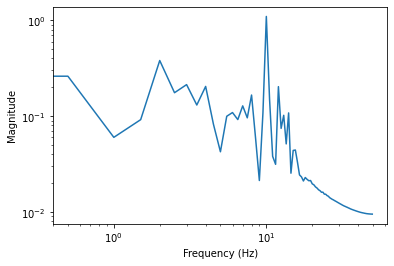

In [16]:
#This section was addedd purely for testing purposes in order to find the cutoff frequencies 
Fs = 100

def FFT_func(signal,N):

    fft = np.fft.fft    # defining FFT as a variable
    
    # frequency response of the 2 sin wave summed signal
    f = Fs*np.arange(N/2)/N                     # freq, x-axis
    signal_FFT = fft(signal)[0:int(N/2)]/N    # FFT of signal
    signal_FFT[1:] = 2*signal_FFT[1:]   # taking positive side 
    signal_FFT = np.abs(signal_FFT)     # neglecting imaginary

    # plot the new signal in frequency domain
    plt.plot(f, signal_FFT) # plotting signal w/ respect to freq
    plt.xscale('log')               # log scale x-axis
    plt.yscale('log')               # log scale y-axis
    plt.xlabel('Frequency (Hz)')    # x-axis, frequency in hertz
    plt.ylabel('Magnitude')         # y-axis, magnitude of signal
    plt.show()

    return signal_FFT       # return the magnitude response

# signal parameters
amwavesq = sig_am*sig_am

# plotting the frequnecy response using the signal from #9
mag_plot = FFT_func(amwavesq,len(amwavesq))

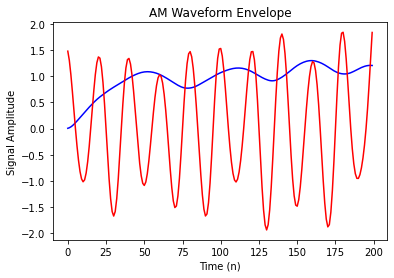

In [17]:
# Squaring the AM signal
amwavesq = sig_am*sig_am

# butterwoth filter parameters
order = 4
samp_freq = 100
cutoff_freq = 2
norm_cutoff = 2*cutoff_freq/samp_freq

# lowpass filtering the squared AM waveform using 4th order butterworth
num, den = scipy.signal.butter(order, norm_cutoff)
filtered_sig = scipy.signal.lfilter(num, den, amwavesq)

# Obtianing baseband signal
bb_sig = np.sqrt(filtered_sig)

plt.plot(bb_sig, 'b', sig_am, 'r')      # plot both the AM wavform and the baseband signal

plt.title("AM Waveform Envelope")
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

## Question 8:
<br> Please implement a product detector for recovering analog signals from PM waveforms.

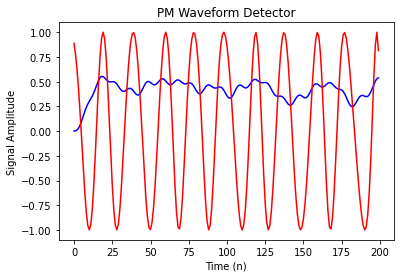

In [18]:
# Multiply PM waveform by cosine
pmwave = sig_pm*np.cos(w_c*n)

# butterwoth filter parameters
order = 4
samp_freq = 100
cutoff_freq = 5
norm_cutoff = 2*cutoff_freq/samp_freq

# lowpass filtering the squared PM waveform using 4th order butterworth
num, den = scipy.signal.butter(order, norm_cutoff)
filtered_sig_pm = scipy.signal.lfilter(num, den, pmwave)

plt.plot(filtered_sig_pm, 'b', sig_pm, 'r')     # plot both the original PM waveform and the filtered PM waveform

plt.title("PM Waveform Detector")
plt.xlabel('Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

## Question 9:
<br>Manually shift the first 5,000 samples plotted by 1.663 MHz such that it falls on the ideal 108 MHz carrier it was originally  transmitted on. Use the function plotfftIQ.py available in Canvas to plot the result.

## Notes:
<br>Students attended office hours and worked with the TA in order to try and solve the issues with this code. Sadly, a solution could not be found. The shift is being applied correctly in theory but the resulting plot does not properly depict the shift. There should be a bump in the shifted data closer to the intended carrier frequency of 108MHz. Students tried different debugging methods in order to find a solution such as instead of using len(y) for the time vector using len(data), then multiplying the exponent by data and then changing to complex values or in other words directly applying the shift to the raw data before it was changed to complex values. When trying this approach students were unable to obtain any plots. The solution that can be seen below is the only solution students were able to make that created a plot. 

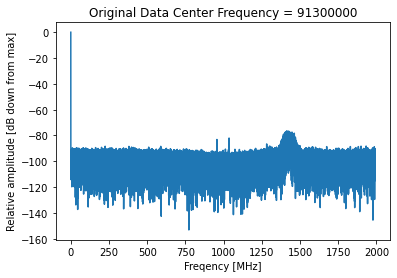

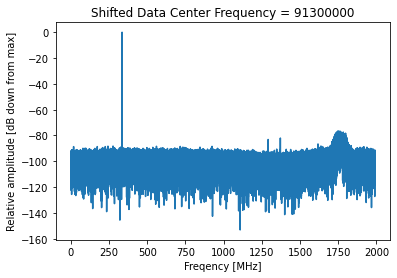

In [19]:
import scipy.signal
from plot_fft_IQ import *

data = np.fromfile("/home/ece3311/ece3311_projects/Project_03/mystery_FM.dat",dtype="uint8") #extracts the data from the file and makes it type uint8 which is a unsigned 8 bit integer that can represent values from 0 to 255

y = data[0::2] + 1j*data[1::2] #converts data to complex values 
plot_FFT_IQ(y,50000, 90000, 2000000, 91300000, title_of_plot="Original Data") #plots the original data

t = np.arange(0, len(y),1) #defines the time vector 
exp = np.exp(-1j*2*np.pi*1.663*t/2) #creates the exponent that will be used to shift the data

y_shifted = np.multiply(y, exp) #by multiplying y by exp we get the shifted data

plot_FFT_IQ(y_shifted, 50000, 90000, 2000000, 91300000, title_of_plot="Shifted Data") #plotting the shifted data


## Question 10:
<br>To remove the side noise and begin lowering the sampling rate to the audio range, decimate the shifted signal by 8 and filter with a Hamming window. Plot your result.
## Notes:
<br>A hamming window of length 90000 was chosen based on the value for nf which is the block size for transform. Students attempted to test other hamming windows. Such as the length of the signal y, length of the signal y shifted, and the length of data. All of those resulted in errors and would not result in a plot. The resulting plot when a hamming window was not applied was also tested and can be seen in one of the plots below. This was not required but was done so for student use. 

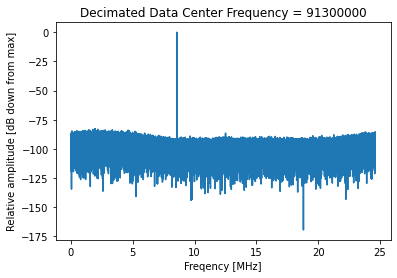

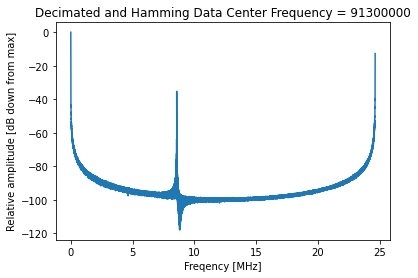

In [20]:
y_decimated = y_shifted[::8] #decimation performed, skips every 8 

y_hammed = scipy.signal.convolve(y_decimated, scipy.signal.hamming(90000)) 

plot_FFT_IQ (y_decimated, 50000, 90000, 25000, 91300000, title_of_plot="Decimated Data") #plotting the decimated data before the hamming window is applied 
plot_FFT_IQ (y_hammed, 50000, 90000, 25000, 91300000, title_of_plot="Decimated and Hamming Data") #plot after the decimated data has been convolved with the hamming window


## Question 11:
<br>Using the supplied FMIQDemod.pyfunction, demodulate the signal to baseband. Plot the resulting signal.
## Notes: 
<br>The decimated data that had a hamming window applied to it from the previous question was then demodulated in this section and plotted. Students also plotted the demodulated data without the hamming window out of curiosity becuase of the previous issues that occured when different hamming lengths were used. Students were unable to include this plot becuase when they tried to include both plots Visual Studio would crash. 

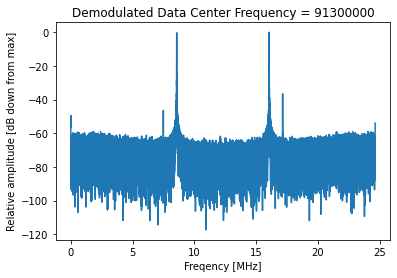

In [21]:
from FM_IQ_Demod import * #import statement to import needed functions

y_fm_demodulated = fm_demod(y_hammed) #calling the function fm_demod un order to demodulate the signal to baseband

plot_FFT_IQ (y_fm_demodulated, 50000, 90000, 25000, 91300000, title_of_plot="Demodulated Data")

## Question 12:
<br>Using a Hamming window and a decimation factor 10, you should be able to listen what you have demodulated. Describe what you hear, and plot the final signal.

## Answer:
<br>The demodulated data was then decimated again and a hamming window was applied. The hamming window was applied the same way it was done in question 10. The resulting plot can be seen. Students then wrote the resulting signal to a wav file. Students tested writing both the signal with the hamming window and without the hamming window. In one instance high pitched notes were heard and in the other very minimal noise was heard. We think this could be due to the hamming window being applied incorrectly or some issue somewhere else in previous sections. Students attended office hours and tried their best to work towards a solution. 

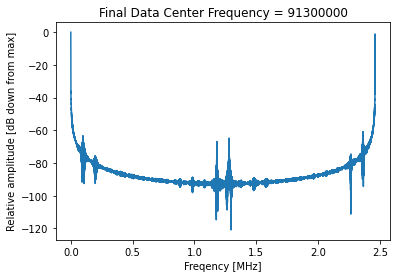

In [22]:
y_decimated2 = y_fm_demodulated[::10] #decimation applied by skipping every 10 
y_hammed2 = scipy.signal.convolve(y_decimated2, scipy.signal.hamming(90000)) #applied the hamming window by convolving it with the decimated signal

plot_FFT_IQ (y_hammed2, 50000, 90000, 2500, 91300000, title_of_plot="Final Data")

In [25]:
from scipy.io import wavfile as wav
from scipy import signal

file = "resulting_sound.wav"

y_hammed2*= 1000 / np.max(np.abs(y_hammed2))               # scale so it's audible
y_hammed2.astype("int16")
wav.write(file, 2500, y_hammed2.real) #writing to an audio file, fs scaled by the decimation factor is 2500Hz
#y_hammed2.astype("int16").tofile("/home/ece3311/ece3311_projects/Project_03/recording.raw")
